In [1]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')



Automatically created module for IPython interactive environment


In this chapter we will learn feature extraction thru PCA
and implement it on visual detection.


In [2]:

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)



2021-07-21 22:05:13,972 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012
2021-07-21 22:05:15,087 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
2021-07-21 22:05:15,950 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
2021-07-21 22:05:17,027 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


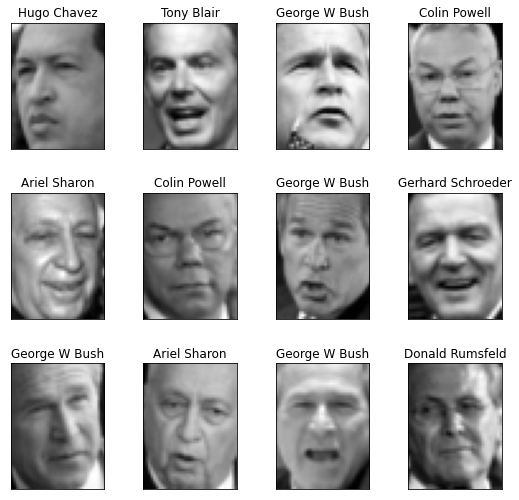

In [3]:
# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
plot_gallery(X,target_names[y],h,w)


Ex. in the next segment split to training and test data compute the eigen faces using
PCA and take 50, 100 , 150 components.
Use plot_gallery to plot the eigen faces 


In [5]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

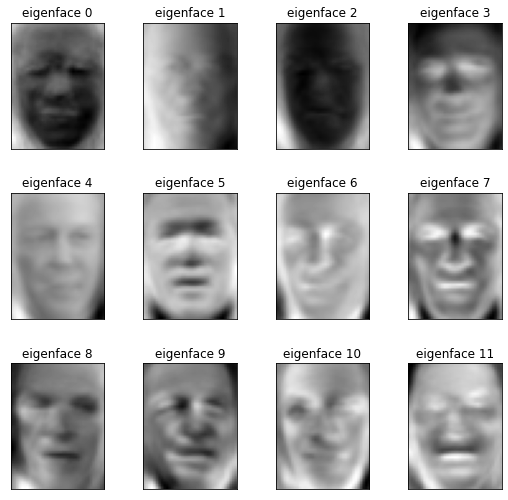

In [14]:
# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 100 # 50 150
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
eigenfaces = pca.components_
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, titles, h, w)

EX. use SVC with kernel RBF 
use GridSearchCV to find the best parameters among them.
plot the best estimator parameters.
plot the classifiaction report and confucsion matrix.
plot some faces and their predictions

In [15]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
svc = SVC(kernel="rbf")
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train_pca, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1000.0, 5000.0, 10000.0, 50000.0, 100000.0],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]})

Best estimator is:  SVC(C=1000.0, gamma=0.005)
-------------------------------------------
                   precision    recall  f1-score   support

     Ariel Sharon       0.64      0.69      0.67        13
     Colin Powell       0.83      0.90      0.86        60
  Donald Rumsfeld       0.78      0.67      0.72        27
    George W Bush       0.87      0.95      0.91       146
Gerhard Schroeder       0.90      0.76      0.83        25
      Hugo Chavez       0.89      0.53      0.67        15
       Tony Blair       0.87      0.75      0.81        36

         accuracy                           0.85       322
        macro avg       0.83      0.75      0.78       322
     weighted avg       0.85      0.85      0.85       322

-------------------------------------------
[[  9   0   2   2   0   0   0]
 [  1  54   0   4   0   1   0]
 [  2   2  18   5   0   0   0]
 [  1   4   1 139   0   0   1]
 [  0   1   1   2  19   0   2]
 [  0   3   0   1   2   8   1]
 [  1   1   1   6   0   0  

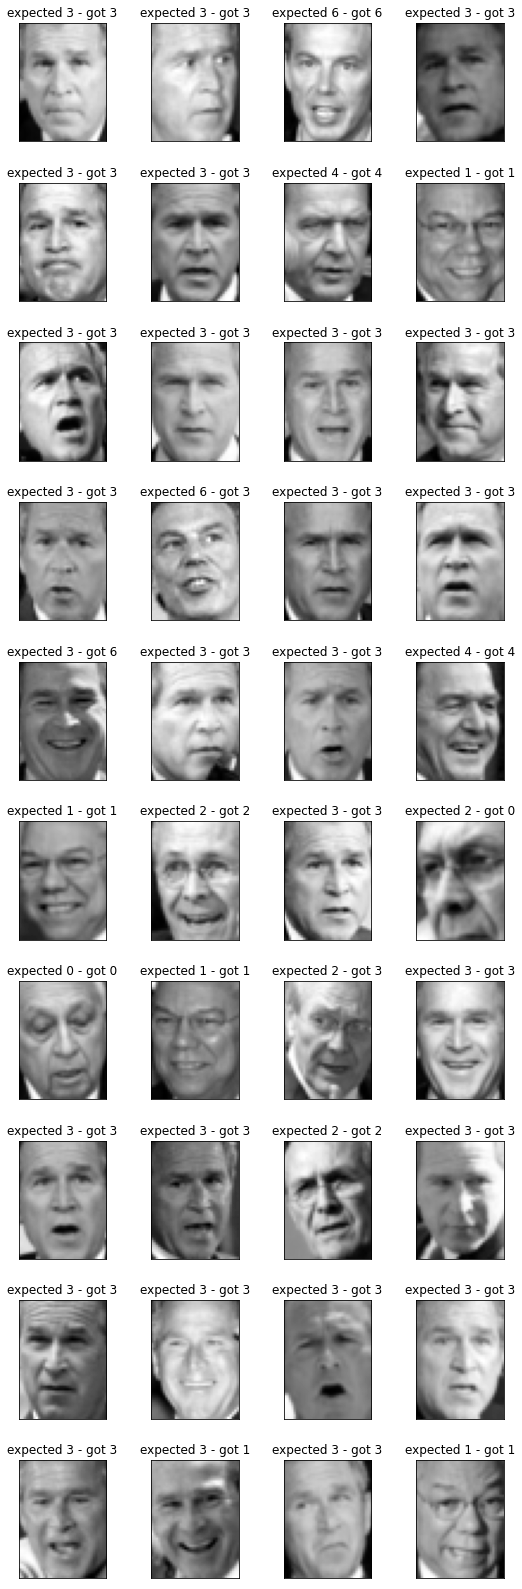

In [16]:
print("Best estimator is: ", clf.best_estimator_)
predictions = clf.predict(X_test_pca)
print("-------------------------------------------")
print(classification_report(y_test, predictions, target_names=target_names))
print("-------------------------------------------")
print(confusion_matrix(y_test, predictions))
expected_predections = []
for i in range(len(y_test)):
    expected_predections.append("expected %d - got %d" %(y_test[i], predictions[i]))

plot_gallery(X_test,expected_predections,h,w,n_row=10)
print("-------------------------------------------")

for i in range(len(target_names)):
    print(i, target_names[i])

print("Score is: ", clf.score(X_test_pca, y_test))